1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.

读取文件，将死亡数填补空缺值为0，值转为数值型。按照国家分组计算死亡数，对计算的死亡数排序并打印前20个国家和死亡数

In [1]:
import pandas as pd 
# 加载数据
df = pd.read_csv('earthquakes-2024-10-26_12-35-45_+0800.tsv', sep='\t')
#填补空缺值为0 将值转为数值型
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce').fillna(0)
# 按国家分组并计算每个国家的总死亡人数
deathByCountry = df.groupby('Location Name')['Deaths'].sum()
# 按死亡人数降序排列，并选择前20个国家
top_20_countries = deathByCountry.sort_values(ascending=False).head(20)
print("Top 20 countries along with the total number of deaths.:")
print(top_20_countries)

Top 20 countries along with the total number of deaths.:
Location Name
CHINA:  SHAANXI PROVINCE                     830313.0
TURKEY:  ANTAKYA (ANTIOCH)                   474870.0
HAITI:  PORT-AU-PRINCE                       316000.0
IRAN:  TABRIZ                                268750.0
TURKEY:  ANTAKYA (ANTIOCH), SAMANDAG         250000.0
CHINA:  NE:  TANGSHAN                        242769.0
AZERBAIJAN:  GYZNDZHA                        230000.0
IRAN:  DAMGHAN, QUMIS                        200000.0
CHINA:  GANSU PROVINCE, SHANXI PROVINCE      200000.0
ARMENIA:  DVIN; IRAN:  ARDABIL               150000.0
JAPAN:  TOKYO, YOKOHAMA                      142809.0
CHINA:  GANSU PROVINCE                       137682.0
SYRIA:  ALEPPO                               130000.0
IRAQ:  AL-MAWSIL                             120000.0
TURKMENISTAN:  ASHKHABAD                     110000.0
CHINA:  SICHUAN PROVINCE                     107213.0
CHINA:  NEI MONGOL:  NINGCHENG               100000.0
PORTUGAL:  

1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

筛选Mag>0的数据，按照年份分组并计算数量，绘制时间序列图。地震数量大幅度上升，我认为这源于地震监测技术的进步、全球地震台网的扩展、数据存储和处理能力的提升等等

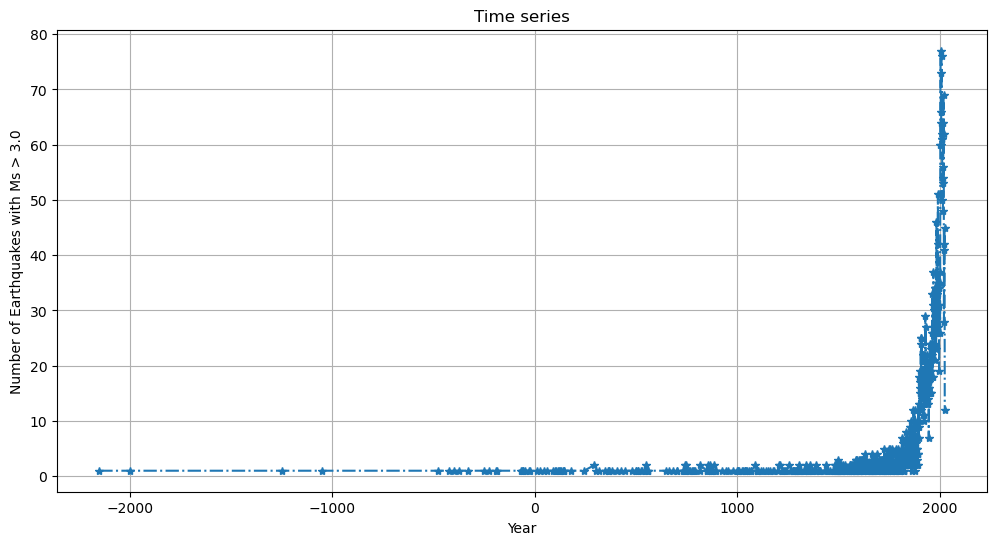

In [4]:
import matplotlib.pyplot as plt
#筛选Mag>0的数据
firtered_df = df[df['Mag'] > 3.0]
#按照年份分组并计算数量
earthquakesByYear = firtered_df.groupby('Year').size()
# 绘制时间序列图
plt.figure(figsize=(12, 6))
plt.plot(earthquakesByYear.index, earthquakesByYear.values, marker='*', linestyle='-.')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes with Ms > 3.0')
plt.title('Time series')
plt.grid()
plt.show()

1.3 [10 points] Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [ ]:
获取到该国家的数据，转换为数值型 填补空缺值为0，按照地震强度进行降序排列，获取第一行的数据 即为最大的地震强度。找到所有国家名称 遍历国家名称，调用CountEq_LargestEq(country_name, df)寻找最大地震，将结果保存在results_df中，然后对results_df按照地震强度进行降序排列

In [6]:
def CountEq_LargestEq(country_name, df):
    #获取到该国家的数据
    country_data = df[df['Location Name'] == country_name].copy()
    #转换为数值型 填补空缺值为0
    country_data['Mag'] = pd.to_numeric(country_data['Mag'], errors='coerce').fillna(0)
    #按照地震强度进行降序排列
    sorted_country_data = country_data.sort_values(by = ['Mag'], ascending=False)
    #获取第一行的数据 即为最大的地震强度
    DateAndLocation = sorted_country_data.iloc[0]
    DateAndLocation = DateAndLocation[["Location Name", "Year", "Mo", "Dy", "Latitude", "Longitude","Mag"]]
    return {
        "Location Name": DateAndLocation["Location Name"],
        "Year": DateAndLocation["Year"],
        "Mo": DateAndLocation["Mo"],
        "Dy": DateAndLocation["Dy"],
        "Latitude": DateAndLocation["Latitude"],
        "Longitude": DateAndLocation["Longitude"],
        "Mag": DateAndLocation["Mag"]
    }

#找到所有国家名称
unique_countries = df['Location Name'].dropna().unique()
#print(unique_countries)
#遍历国家名称
for country in unique_countries:
    results.append(CountEq_LargestEq(country, df))
results_df = pd.DataFrame(results)
# 根据 地震强度 排序
results_df = results_df.sort_values(by='Mag', ascending=False).reset_index(drop=True)
print(results_df)
#print(CountEq_LargestEq("GREECE", df))

                       Location Name    Year    Mo    Dy  Latitude  Longitude  \
0     CHILE:  PUERTO MONTT, VALDIVIA  1960.0   5.0  22.0   -38.143    -73.407   
1     CHILE:  PUERTO MONTT, VALDIVIA  1960.0   5.0  22.0   -38.143    -73.407   
2                             ALASKA  1964.0   3.0  28.0    60.908   -147.339   
3                             ALASKA  1964.0   3.0  28.0    60.908   -147.339   
4                 CHILE:  VALPARAISO  1730.0   7.0   8.0   -32.500    -71.500   
...                              ...     ...   ...   ...       ...        ...   
7985                 MEXICO:  PUEBLA  1667.0   7.0  30.0    18.800    -98.000   
7986      NE. HOKKAIDO ISLAND, JAPAN  1956.0   3.0   5.0    44.300    144.100   
7987                  IRAN:  LAHIJAN  1667.0   2.0   3.0    37.200     50.000   
7988       IRAQ:  AL-MAWSIL; ARMENIA  1666.0  11.0   NaN    36.000     42.500   
7989              IRAN:  ST THADDEUS  1696.0   5.0   NaN    39.300     44.600   

      Mag  
0     9.5  
1  

2. Air temperature in Shenzhen during the past 25 years
 
In this problem set, we will examine how air temperature changes in Shenzhen during the past 25 years using the hourly weather data measured at the Baoan International Airport. The data set is from NOAA Integrated Surface Dataset. Download the file Baoan_Weather_1998_2022.csv, move the .csv file to your working directory.

Read page 10-11 (POS 88-92 and POS 93-93) of the comprehensive user guide for the detailed format of the air temperature data (use column TMP). Explain how you filter the data in your report.

[10 points] Plot monthly averaged air temperature against the observation time. Is there a trend in monthly averaged air temperature in the past 25 years?

对于无效值+9999,9我们将其替换为了空值；之后对其余有效值进行分解，去掉+号，去掉‘，’以及‘，’以后的内容。将"DATE"列转换为标准的日期格式，之后将"DATE"设置为数据索引，按月重采样取平均值。
可以看到，在过去的25年，月平均气温呈现季节性趋势。

C:\Users\16869\AppData\Local\Temp\ipykernel_21348\920745507.py:4: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,28,30,33,36,37,39,40,44,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\Python\Baoan_Weather_1998_2022.csv' )


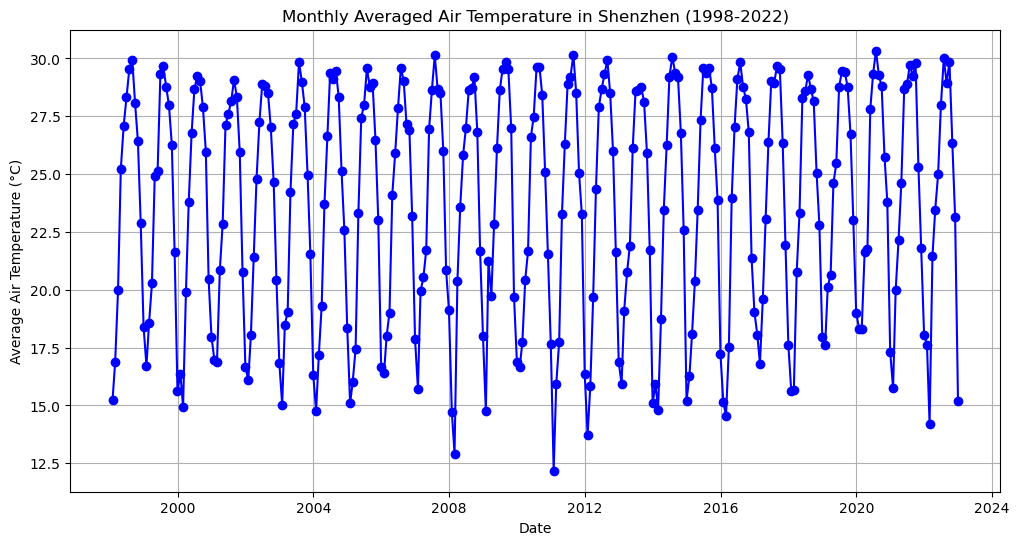

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('D:\Python\Baoan_Weather_1998_2022.csv' )
#去除空值
data['TMP'] = data['TMP'].replace('+9999,9', None)
# 只保留逗号前的部分
data['TMP'] = data['TMP'].str.split(',').str[0]  
# 移除前面的 '+'
data['TMP'] = data['TMP'].str.replace('+', '', regex=False) 
 # 转换 TMP 列为浮点型
data['TMP'] = data['TMP'].astype(float)/ 10.0  
# 删除 TMP 列中为 NaN 的行
data = data.dropna(subset=['TMP'])  
#将日期转换为标准日期格式
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%dT%H:%M:%S') 
#设置日期为索引
data.set_index('DATE', inplace=True)
#按月重采样并计算平均值
monthly_avg_temp = data['TMP'].resample('ME').mean() 


plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp, marker='o', linestyle='-', color='b')
plt.title('Monthly Averaged Air Temperature in Shenzhen (1998-2022)')
plt.xlabel('Date')
plt.ylabel('Average Air Temperature (°C)')
plt.xticks()
plt.grid()
plt.show()


3. Global collection of hurricanes

The International Best Track Archive for Climate Stewardship (IBTrACS) project is the most complete global collection of tropical cyclones available. It merges recent and historical tropical cyclone data from multiple agencies to create a unified, publicly available, best-track dataset that improves inter-agency comparisons. IBTrACS was developed collaboratively with all the World Meteorological Organization (WMO) Regional Specialized Meteorological Centers, as well as other organizations and individuals from around the world.

In this problem set, we will use all storms available in the IBTrACS record since 1842. Download the file ibtracs.ALL.list.v04r00.csv, move the .csv file to your working directory. Read Column Variable Descriptions for variables in the file. Examine the first few lines of the file.

Below we provide an example to load the file as a pandas dataframe. Think about the options being used and why, and modify when necessary.

3.1 [5 points] Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).

读取数据的前17列，跳过1、2行、将日期转为标准格式、将NOT_NAMED和NAME值变为空值。按照SID分组，找到最大风速，将结果放到一个新的DataFrame中，之后根据SID进行匹配找到飓风名称，得到TopHurricanes，其中包含每个飓风的 SID、最高风速 WMO_WIND 和飓风名称 NAME。对TopHurricanes进行降序

In [57]:
import pandas as pd
StormData = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
#打印前几行
StormData.head()
#StormData = pd.read_csv('D:\Python\ibtracs.ALL.list.v04r01.csv')
#将WMO_WIN数据转为数值型，并填补空缺值为0
StormData['WMO_WIND'] = pd.to_numeric(StormData['WMO_WIND'], errors='coerce').fillna(0)
#按照SID分组，找到WMO_WIND最大值 使用 .reset_index() 将分组结果转换为一个 DataFrame，命名为 MaxSpeed，其中包含两列：SID 和每个飓风的最高风速 WMO_WIND。
MaxSpeed = StormData.groupby('SID')['WMO_WIND'].max().reset_index()
# merge根据 SID 进行匹配，得到一个新的 DataFrame TopHurricanes，其中包含每个飓风的 SID、最高风速 WMO_WIND 和飓风名称 NAME。
TopHurricanes = MaxSpeed.merge(StormData[['SID', 'NAME']], on='SID').drop_duplicates(subset='SID')
#按照WMO_WIND降序排列答
TopTen = TopHurricanes.sort_values(by='WMO_WIND', ascending=False).head(10)
print(TopTen[['NAME', 'WMO_WIND']])

C:\Users\16869\AppData\Local\Temp\ipykernel_22860\2989772390.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  StormData = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


            NAME  WMO_WIND
665928  PATRICIA     185.0
427578     ALLEN     165.0
552437     LINDA     160.0
605716     WILMA     160.0
689261    DORIAN     160.0
482031   GILBERT     160.0
178171       NaN     160.0
560399     MITCH     155.0
676089      IRMA     155.0
629164      RICK     155.0


In [ ]:
3.2 [5 points] Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.

对TopHurricanes进行降序排列，找到前20个最大台风

                  SID  WMO_WIND      NAME
665928  2015293N13266     185.0  PATRICIA
427578  1980214N11330     165.0     ALLEN
552437  1997253N12255     160.0     LINDA
605716  2005289N18282     160.0     WILMA
689261  2019236N10314     160.0    DORIAN
482031  1988253N12306     160.0   GILBERT
178171  1935241N23291     160.0       NaN
560399  1998295N12284     155.0     MITCH
676089  2017242N16333     155.0      IRMA
629164  2009288N07267     155.0      RICK
604948  2005261N21290     155.0      RITA
407101  1977242N27272     150.0     ANITA
676982  2017260N12310     150.0     MARIA
615964  2007244N12303     150.0     FELIX
421457  1979238N12324     150.0     DAVID
345889  1969226N18280     150.0   CAMILLE
258207  1955265N13307     150.0     JANET
667380  2016041S14170     150.0   WINSTON
603745  2005236N23285     150.0   KATRINA
279349  1959249N19181     150.0     PATSY


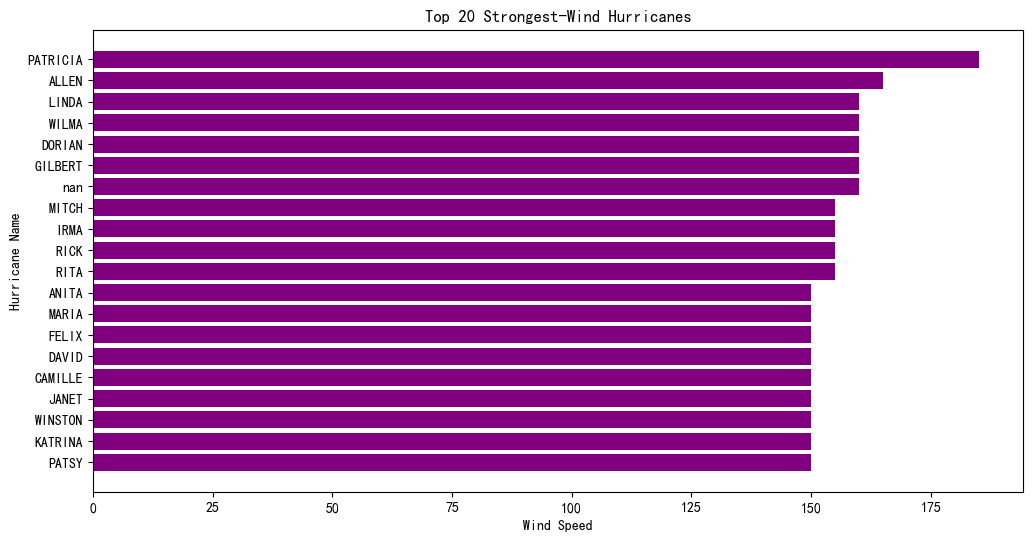

In [62]:
import matplotlib.pyplot as plt
TopTwenty = TopHurricanes.sort_values(by='WMO_WIND', ascending=False).head(20)
# 绘制柱状图
# 绘制柱状图
print(TopTwenty)
plt.figure(figsize=(12, 6))
plt.barh(TopTwenty['NAME'].astype(str), TopTwenty['WMO_WIND'], color='purple')
plt.xlabel('Wind Speed')
plt.ylabel('Hurricane Name')
plt.title('Top 20 Strongest-Wind Hurricanes')
plt.gca().invert_yaxis()  # 将最强风速飓风放在顶部
plt.show()

3.3 [5 points] Plot the count of all datapoints by Basin as a bar chart.

按照BASIN进行分组 计算分组后的数据点数

BASIN
EP     62412
NI     55401
SA       119
SI    160668
SP     67119
WP    236576
dtype: int64


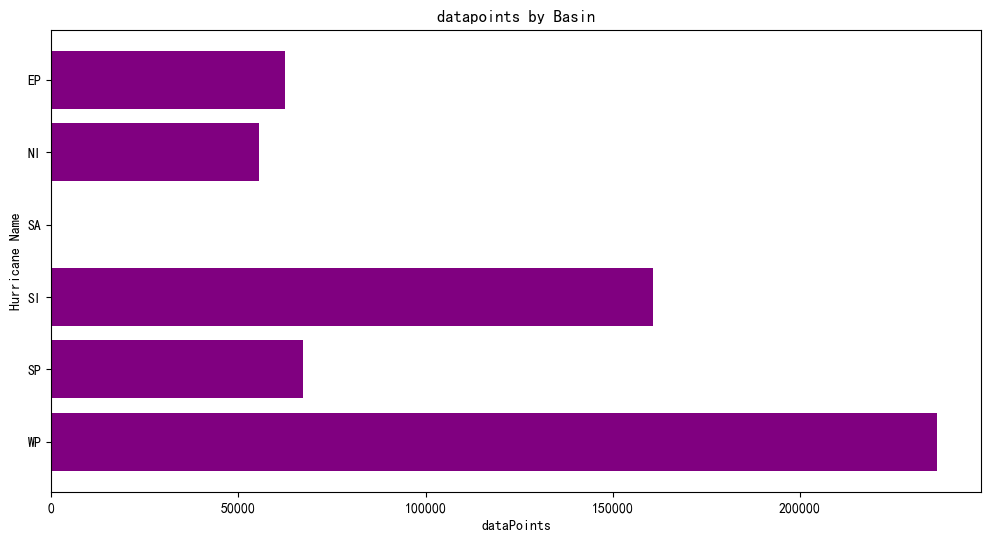

In [63]:
#按照BASIN进行分组 计算分组后的数据点数
dataPoints = StormData.groupby('BASIN').size()
print(dataPoints)
plt.figure(figsize=(12, 6))
plt.barh(dataPoints.index,dataPoints.values, color='purple')
plt.xlabel('dataPoints')
plt.ylabel('Hurricane Name')
plt.title('datapoints by Basin')
# 将最强风速飓风放在顶部
plt.gca().invert_yaxis()  
plt.show()

3.4 [5 points] Make a hexbin plot of the location of datapoints in Latitude and Longitude.

将经纬度数据转为数值型 删除无效的经纬度数据

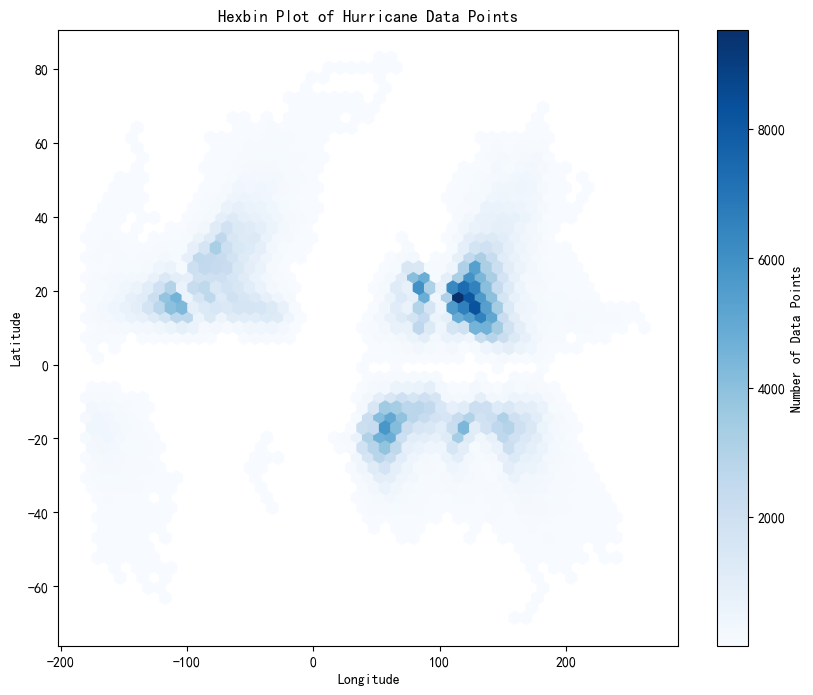

In [64]:
#将经纬度数据转为数值型
StormData['LAT'] = pd.to_numeric(StormData['LAT'], errors='coerce')
StormData['LON'] = pd.to_numeric(StormData['LON'], errors='coerce')
# 删除无效的经纬度数据
StormData = StormData.dropna(subset=['LAT', 'LON'])
# 绘制六边形图
plt.figure(figsize=(10, 8))
plt.hexbin(StormData['LON'], StormData['LAT'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Number of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Hurricane Data Points')
plt.show()

3.5 [5 points] Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.

对年份处理，转为数值型，筛选名称为MANGKHUT并且年份大于等于2018年的台风，将经纬度作为xy轴绘制散点图

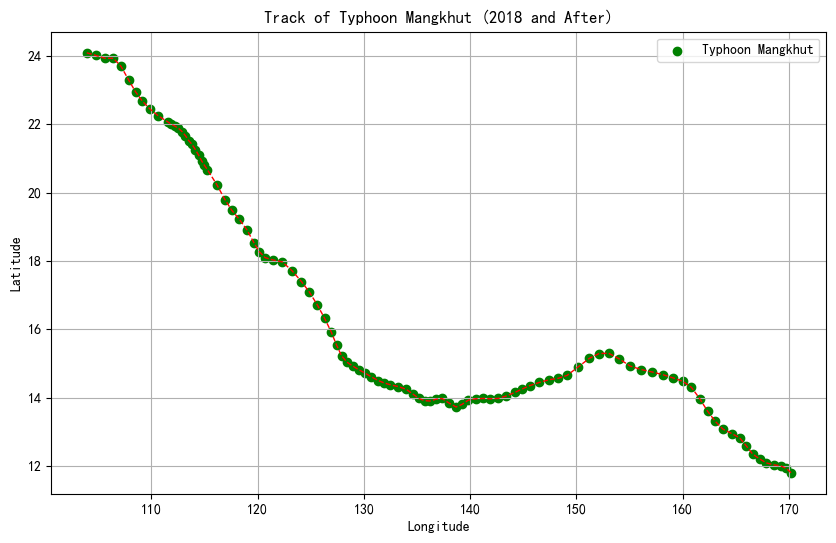

In [65]:
#对年份处理，转为数值型
StormData['SEASON'] = pd.to_numeric(StormData['SEASON'], errors='coerce').fillna(0)
#筛选名称为MANGKHUT并且年份大于等于2018年的台风
mangkhut_data = StormData[(StormData['NAME'] == 'MANGKHUT') & (StormData['SEASON'] >= 2018)]
# 绘制轨迹的散点图
plt.figure(figsize=(10, 6))
plt.scatter(mangkhut_data['LON'], mangkhut_data['LAT'], c='green', marker='o', label='Typhoon Mangkhut')
plt.plot(mangkhut_data['LON'], mangkhut_data['LAT'], color='red', linewidth=1, linestyle='--')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018 and After)')
plt.legend()
plt.grid()
plt.show()

3.6 [5 points] Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.

In [10]:
filteredStormData = StormData[
    (StormData['SEASON'] >= 1970) &
    (StormData['BASIN'].isin(['WP', 'EP']))
]

3.7 [5 points] Plot the number of datapoints per day.

对filteredStormData按照年份分组并计数，之后绘制

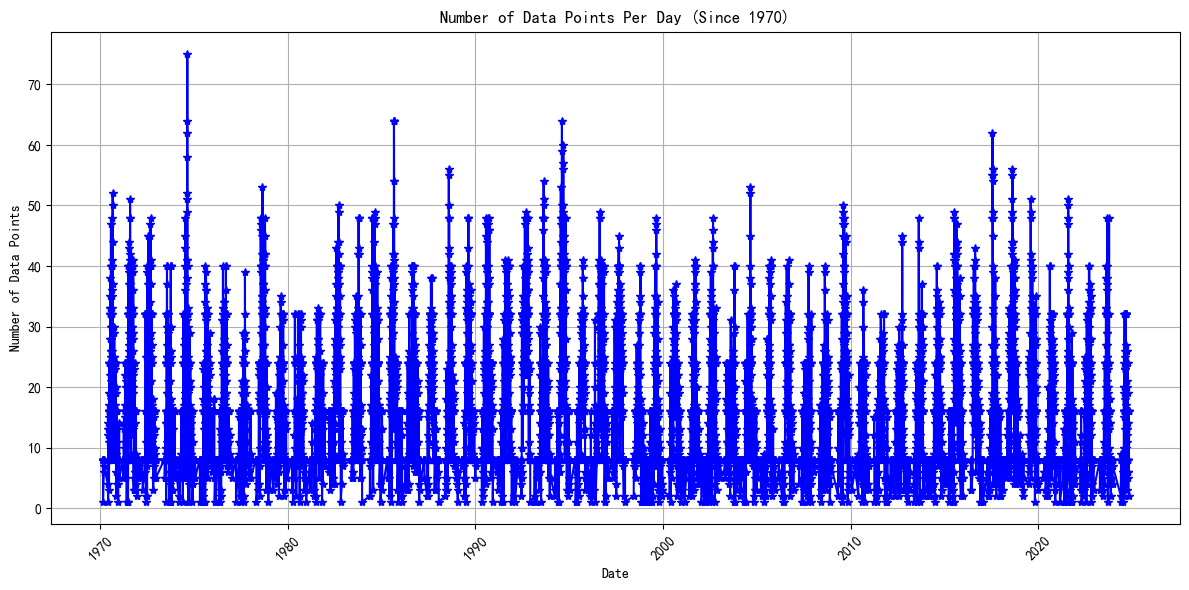

In [66]:
# 按日期分组并计数
daily_counts = filteredStormData.groupby(filteredStormData['ISO_TIME'].dt.date).size()
# 绘制每天的数据点数量
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='*', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points Per Day (Since 1970)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

3.8 [5 points] Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.

计算每一天的数据点计数，并按一年中的第几天（DOY）和年份分组, 对每一天计算平均值，按所有年份数量计算平均.

55


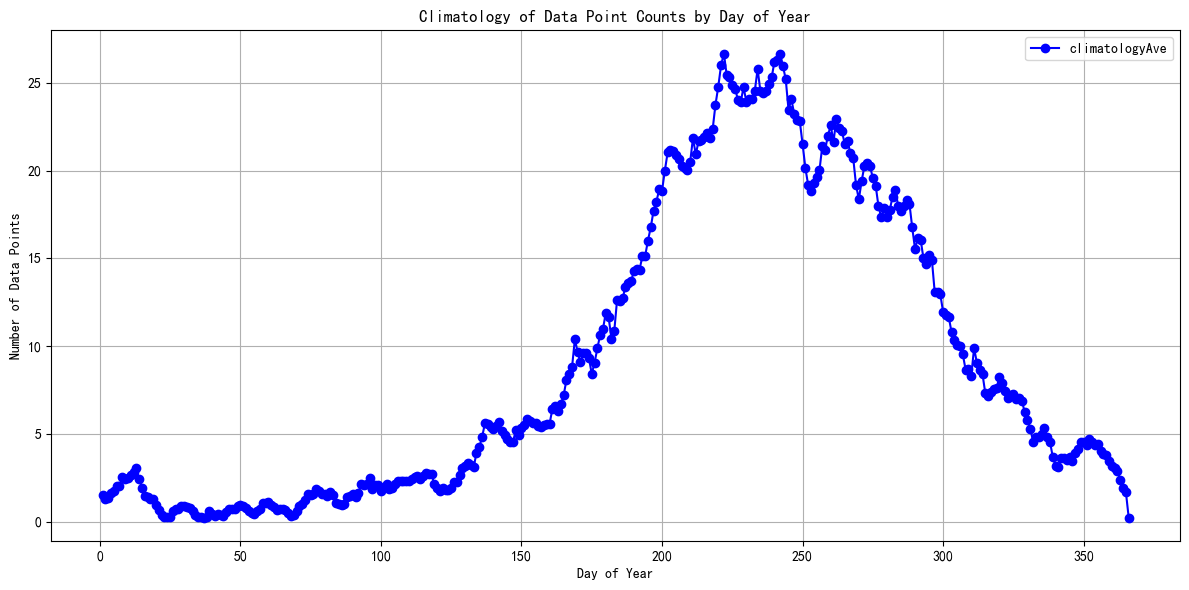

In [67]:
pd.set_option('display.max_rows', 500)  # 设置最大行数为500
# 计算每一天的数据点计数，并按一年中的第几天（DOY）和年份分组
# 提取一年中的第几天 (DOY)
# 使用 .loc 进行赋值操作
filteredStormData.loc[:, 'DOY'] = filteredStormData['ISO_TIME'].dt.dayofyear
YearsCount = filteredStormData['ISO_TIME'].dt.year.nunique()
print(YearsCount)
# 按 DOY 分组，计算每天的数据点数量
daily_counts = filteredStormData.groupby(['DOY',filteredStormData['ISO_TIME'].dt.year]).size()
#print(daily_counts)
# 计算每一天的数据点数气候平均值
climatologyAve = daily_counts.groupby('DOY').sum()/YearsCount
#print(climatology_counts)

plt.figure(figsize=(12, 6))
plt.plot(climatologyAve.index, climatologyAve.values, marker='o', linestyle='-', color='b', label='climatologyAve')
plt.xlabel('Day of Year')
plt.ylabel('Number of Data Points')
plt.title('Climatology of Data Point Counts by Day of Year')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

3.9 [5 points] Calculate the anomaly of daily counts from the climatology.

对每天出现的数据进行检查若超过气候平均值记为异常，不超过则为正常

DOY
1      5.090909
2      0.000000
3     10.181818
4      8.166667
5      7.916667
6     14.615385
7     14.615385
8     12.937500
9      8.882353
10     7.941176
11     4.833333
12     3.600000
13     5.904762
14    12.526316
15    10.266667
16     6.363636
17     1.600000
18     0.000000
19     8.000000
20     7.250000
Name: Anomaly, dtype: float64


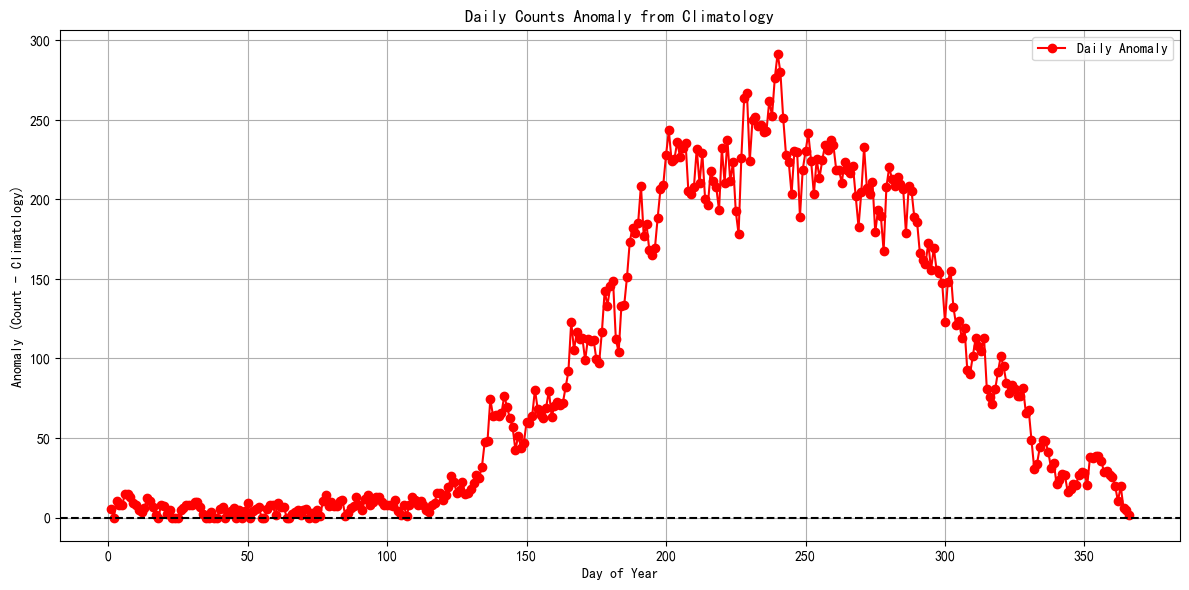

In [68]:
# 这里需要确保 daily_counts 也按 DOY 聚合
daily_counts_normalized = daily_counts.reset_index(name='Count')  # 重置索引并命名新列
daily_counts_normalized['DOY'] = daily_counts_normalized['DOY'].astype(int)  # 确保 DOY 是整数类型

# 将气候学平均值合并到 daily_counts_normalized 中
daily_counts_normalized = daily_counts_normalized.merge(climatology_avg.rename('Climatology'), 
                                                         left_on='DOY', 
                                                     right_index=True)
# 计算异常值
daily_counts_normalized['Anomaly'] = daily_counts_normalized['Count'] - daily_counts_normalized['Climatology']
# 打印异常值数据框的前几行以进行检查
total_daily_positive_anomalies = daily_counts_normalized[daily_counts_normalized['Anomaly'] >= 0].groupby('DOY')['Anomaly'].sum()
print(total_daily_positive_anomalies.head(20))

# 4. 可视化异常值
plt.figure(figsize=(12, 6))
plt.plot(total_daily_positive_anomalies.index, total_daily_positive_anomalies.values, marker='o', linestyle='-', color='r', label='Daily Anomaly')
plt.xlabel('Day of Year')
plt.ylabel('Anomaly (Count - Climatology)')
plt.title('Daily Counts Anomaly from Climatology')
plt.axhline(0, color='black', linestyle='--')  # 添加 y=0 参考线
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

3.10 [5 points] Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?


对每年的异常值求和，并绘制;可以看到1992年异常台风活动最多

       DOY  ISO_TIME  Count  Climatology   Anomaly
0        1      1978      8     7.545455  0.454545
1        1      1979      8     7.545455  0.454545
2        1      1987      8     7.545455  0.454545
3        1      1994      9     7.545455  1.454545
4        1      1996      8     7.545455  0.454545
...    ...       ...    ...          ...       ...
11171  365      2015      8     8.454545 -0.454545
11172  365      2017      8     8.454545 -0.454545
11173  365      2018      8     8.454545 -0.454545
11174  366      1996      5     6.500000 -1.500000
11175  366      2000      8     6.500000  1.500000

[11176 rows x 5 columns]


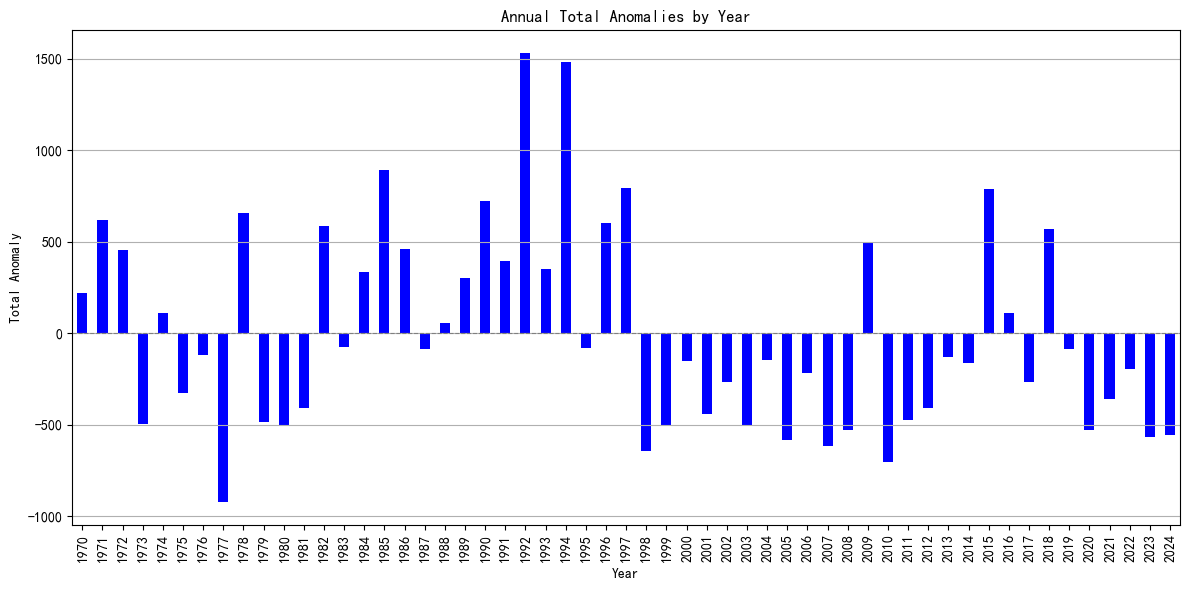

In [69]:
print(daily_counts_normalized)
#按照时间划分并求和Anomaly
annual_anomalies = daily_counts_normalized.groupby('ISO_TIME')['Anomaly'].sum()

# 绘制年度异常值图表
plt.figure(figsize=(12, 6))
annual_anomalies.plot(kind='bar', color='b')
plt.xlabel('Year')
plt.ylabel('Total Anomaly')
plt.title('Annual Total Anomalies by Year')
plt.axhline(0, color='grey', lw=0.8, linestyle='--')  # 添加一条水平线
plt.grid(axis='y')
plt.tight_layout()
plt.show()

4. Explore a data set

Browse the National Centers for Environmental Information (NCEI) or Advanced Global Atmospheric Gases Experiment (AGAGE) website. Search and download a data set you are interested in. You are also welcome to use data from your group in this problem set. But the data set should be in csv, XLS, or XLSX format, and have temporal information.

4.1 [5 points] Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.

In [ ]:
加载前17列，由于日期数据格式不统一，需要对日期进行处理；对CDSD数据处理，转为数值型，空缺值填补为0

In [34]:
import pandas as pd 
# 加载数据
WindData= pd.read_csv('WindData.csv', sep='\t')
WindData = pd.read_csv('WindData.csv',
                 usecols=range(17))
WindData.columns = WindData.columns.str.strip() 
print(WindData.head())
# 创建起始日期
start_date = pd.Timestamp('1869-01')
# 创建日期列
WindData['Date'] = [start_date + pd.DateOffset(months=i) for i in range(len(WindData))]
WindData['CDSD'] = pd.to_numeric(WindData['CDSD'], errors='coerce').fillna(0)
print(WindData['Date'])

       STATION     DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  USW00094728  1869-01  40.77898  -73.96925       42.7   
1  USW00094728  1869-02  40.77898  -73.96925       42.7   
2  USW00094728  1869-03  40.77898  -73.96925       42.7   
3  USW00094728  1869-04  40.77898  -73.96925       42.7   
4  USW00094728  1869-05  40.77898  -73.96925       42.7   

                          NAME  ADPT ADPT_ATTRIBUTES  ASLP ASLP_ATTRIBUTES  \
0  NY CITY CENTRAL PARK, NY US   NaN             NaN   NaN             NaN   
1  NY CITY CENTRAL PARK, NY US   NaN             NaN   NaN             NaN   
2  NY CITY CENTRAL PARK, NY US   NaN             NaN   NaN             NaN   
3  NY CITY CENTRAL PARK, NY US   NaN             NaN   NaN             NaN   
4  NY CITY CENTRAL PARK, NY US   NaN             NaN   NaN             NaN   

   ASTP ASTP_ATTRIBUTES  AWBT AWBT_ATTRIBUTES  AWND AWND_ATTRIBUTES  CDSD  
0   NaN             NaN   NaN             NaN   NaN             NaN   0.0  
1   NaN             NaN 

4.2 [5 points] Plot the time series of a certain variable.

CDSD用于衡量一个地区在特定时间段内对制冷需求的需求。

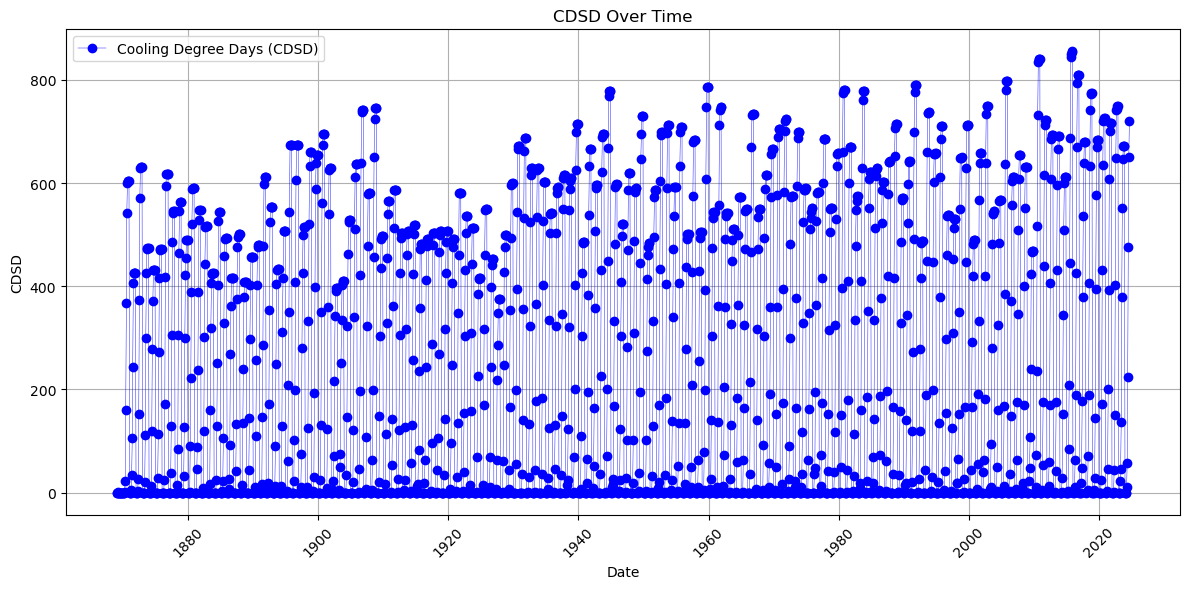

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 确保日期列是datetime格式
WindData['Date'] = pd.to_datetime(WindData['Date'])
# 创建图形
plt.figure(figsize=(12, 6))
plt.plot(WindData['Date'], WindData['CDSD'], marker='o', linestyle='-', color='b', label='Cooling Degree Days (CDSD)',linewidth=0.3)
plt.xlabel('Date')
plt.ylabel('CDSD')
plt.title('CDSD Over Time')
plt.xticks(rotation=45)  
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


4.3 [5 points] Conduct at least 5 simple statistical checks with the variable, and report your findings.

0       1
1       2
2       3
3       4
4       5
       ..
1864    5
1865    6
1866    7
1867    8
1868    9
Name: Month, Length: 1869, dtype: int32


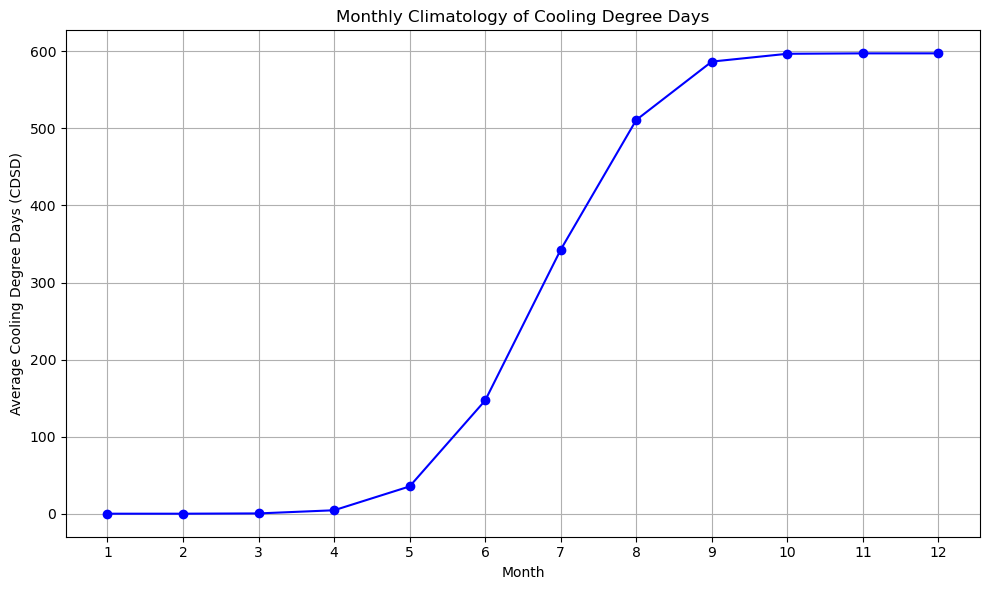

In [36]:
#1.气候平均值分析
WindData['Month'] = WindData['Date'].dt.month
print(WindData['Month'])
monthly_climatology = WindData.groupby('Month')['CDSD'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_climatology['Month'], monthly_climatology['CDSD'], marker='o', linestyle='-', color='b')
plt.xticks(monthly_climatology['Month'])  # 设置 x 轴的刻度
plt.xlabel('Month')
plt.ylabel('Average Cooling Degree Days (CDSD)')
plt.title('Monthly Climatology of Cooling Degree Days')
plt.grid()
plt.tight_layout()
plt.show()

从图中可以看出，CDSD值随季节变化逐渐上升1-3月几乎为0，4月开始逐步上升，到9-12月达到巅峰。CDSD是衡量在气温高于基准温度（通常为18°C）时，为了保持室内舒适所需的冷却需求。
纽约地区1-3月份温度较低，一般低于1818°C 制冷量要求为0

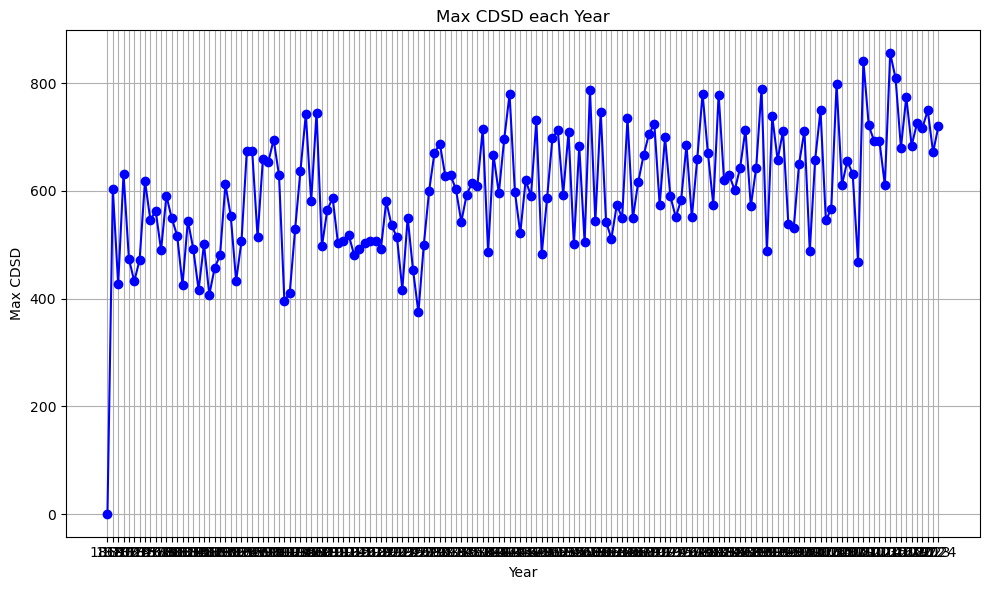

In [37]:
#2.每年最大CDSD随时间变化趋势分析
WindData['Year'] = WindData['Date'].dt.year
YearMaxCDSD = WindData.groupby('Year')['CDSD'].max()
#print(YearMaxCDSD)
plt.figure(figsize=(10, 6))
plt.plot(YearMaxCDSD.index, YearMaxCDSD.values, marker='o', linestyle='-', color='b')
plt.xticks(YearMaxCDSD.index)  # 设置 x 轴的刻度
plt.xlabel('Year')
plt.ylabel('Max CDSD')
plt.title('Max CDSD each Year')
plt.grid()
plt.tight_layout()
plt.show()

可以看到每年的最大CDSD整体呈上升趋势，这可能源于气温在随时间逐渐升高、城市不断发展以及人们制冷的要求更高等

In [38]:
#3.计算每年最大值得标准差和方差

# 计算方差
variance = YearMaxCDSD.var()
print("方差:", variance)

# 计算标准差
std_dev = YearMaxCDSD.std()
print("标准差:", std_dev)

方差: 13025.049304797349
标准差: 114.12733811316791


CDSD随年份变化波动较大

In [39]:
#4.得到最大值和最小值所在的年份
max_index = YearMaxCDSD.idxmax()
print("最大值所在的索引:", max_index)
min_index = YearMaxCDSD.idxmin()
print("最大值所在的索引:", min_index)

最大值所在的索引: 2015
最大值所在的索引: 1869


2015年的制冷需求最高，1869年的制冷需求最低

预测的2025年的CDSD为：705.3441108354009
斜率 (slope): 1.3641663637369414
截距 (intercept): -2057.0927757319055
相关系数 (R-squared): 0.2916072401422385


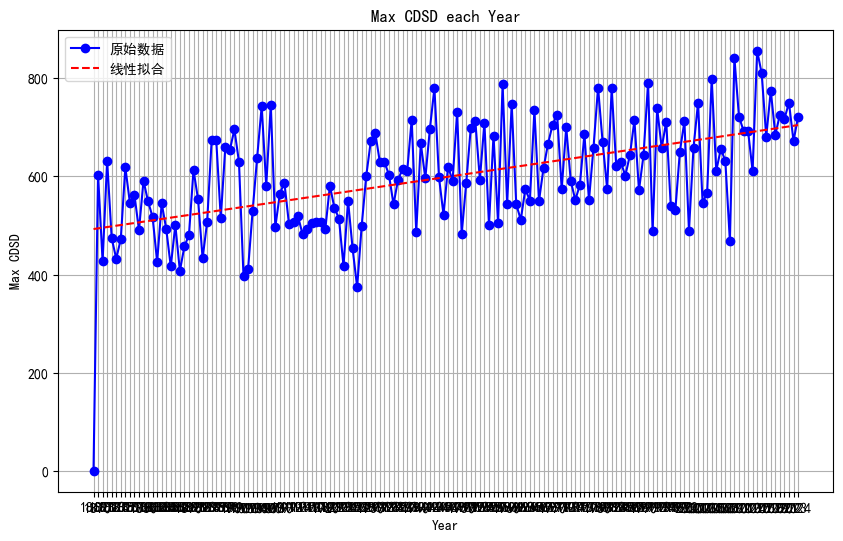

In [40]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
YearMaxCDSDlinear = YearMaxCDSD
# 进行线性拟合
slope, intercept, r_value, p_value, std_err = linregress(YearMaxCDSDlinear.index, YearMaxCDSDlinear.values)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号无法显示的问题
# 预测2025年的CDSD
CDSD2025 = slope * 2025 + intercept
print(f"预测的2025年的CDSD为：{CDSD2025}")
print(f"斜率 (slope): {slope}")
print(f"截距 (intercept): {intercept}")
print(f"相关系数 (R-squared): {r_value**2}")

# 添加拟合结果
YearMaxCDSDlinear = YearMaxCDSDlinear.to_frame(name='CDSD')  # 转为DataFrame方便操作
YearMaxCDSDlinear['Fitted_CDSD'] = slope * YearMaxCDSDlinear.index + intercept

# 绘制原始数据和拟合曲线
plt.figure(figsize=(10, 6))
plt.plot(YearMaxCDSDlinear.index, YearMaxCDSDlinear['CDSD'], marker='o', linestyle='-', color='b', label='原始数据')
plt.plot(YearMaxCDSDlinear.index, YearMaxCDSDlinear['Fitted_CDSD'], color='red', linestyle='--', label='线性拟合')
plt.xticks(YearMaxCDSD.index)  # 设置 x 轴的刻度
plt.xlabel('Year')
plt.ylabel('Max CDSD')
plt.title('Max CDSD each Year')
plt.legend()
plt.grid()
#plt.tight_layout()
plt.show()


对每年的CDSD的最大值进行了线性回归，并对2025年的CDSD最大值进行了预测，预测结果为705.3441108354009具有一定的参考意义